<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_classification.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_classification.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Image Classification
The classification of remotely sensed images consists in associating each pixel of the image with a specific class or category (e.g. grassland, forest, water, soil, etc.).
Identification occurs through a process in which the degree of spectral similarity or association is high between pixels of the same category and low between pixels of distinct categories.
> For this first application of the classification methods we use two sets of images: 
* the recent images of [Solar Orbiter](http://www.esa.int/Science_Exploration/Space_Science/Solar_Orbiter) with different energy classes of the solar surface;
* and the Landsat images of the [Grand Canyon](https://landsat.visibleearth.nasa.gov/view.php?id=80948) with different morphologies and types of rocks.

In [1]:
solar_orbiter_url <- "https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/07/solar_orbiter_s_first_views_of_the_sun4/22133246-1-eng-GB/Solar_Orbiter_s_first_views_of_the_Sun.jpg"
grand_canyon_url <- "https://eoimages.gsfc.nasa.gov/images/imagerecords/80000/80948/dolansprings_oli_2013088_canyon_lrg.jpg"

The [download.file](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/download.file) function can be used to download a file from the Internet. 
```
download.file(url, destfile)
```
In the function the `url` argument sets the resource to be downloaded and the `destfile` a character string with which the downloaded file is named.

In [2]:
download.file(solar_orbiter_url, "Solar_Orbiter.jpg")
download.file(grand_canyon_url, "Grand_Canyon.jpg")

### Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
To install multiple packages at the same time, you define a vector that contains the names of the packages to be installed.
The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-10) package defines classes and methods for spatial raster data access and manipulation. 
[RStoolbox](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6) is an package providing a wide range of tools for your every-day remote sensing processing needs. The available tool-set covers many aspects for remote sensing image processing and analysis such as calculating spectral indices, principal component transformation, unsupervised and supervised classification or fractional cover analyses.

In [ ]:
packages <- c("raster", "RStoolbox")
install.packages(packages)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
Using the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we simultaneously apply the `library()` function to all elements of the vector containing the packages.

In [ ]:
lapply(packages , library, character.only = TRUE)

## Solar Orbiter
During the seven-year mission, instruments aboard the spacecraft will measure solar wind plasma, electromagnetic fields, and energetic particles in an area close enough to the sun. Remote sensing tools, on the other hand, will send spectacular images of solar characteristics with a resolution never achieved before and provide new information on what determines the cyclicality of sunspots and the onset of flares.

### Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 
Explore the properties of the `solar_orbiter` object.

In [ ]:
solar_orbiter <- brick("Solar_Orbiter.jpg")
solar_orbiter

### Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.
In addition, individual bands can be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from multi-band satellite images.
In this case, the resulting color tone in the image will be linked to the combination of the different energy values of the solar surface.


In [ ]:
plotRGB(solar_orbiter, 1,2,3, stretch="lin")

### Unsupervised clustering
[K-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering is one of the simplest and popular unsupervised learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

The `RStoolbox` package provides the [unsuperClass](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6/topics/unsuperClass) function which allows you to apply the k-means algorithm to any Raster Object.

Furthermore, by setting the same seed with the [set.seed](https://www.rdocumentation.org/packages/simEd/versions/2.0.0/topics/set.seed) function (a random number generator) we always select the same initial pixels during the construction phase of the n-clusters in order to always show the same output.


In [56]:
set.seed(1234)
solar_orbiter_class6 <- RStoolbox::unsuperClass(solar_orbiter, nClasses=6)

### Colour change
Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into n-levels or classes.

In [60]:
cl <- colorRampPalette(c('yellow', 'red', 'black'))(6)

In [ ]:
pdf(file = '/content/my_plot.pdf')
plot(solar_orbiter_class6$map, col=cl, axes= FALSE)
dev.off()

Download Solar Orbiter data and proceed further!
Grand Canyon
https://landsat.visibleearth.nasa.gov/view.php?id=80948
When John Wesley Powell led an expedition down the Colorado River and through the Grand Canyon in 1869,

In [ ]:
gc <- brick("Grand_Canyon.jpg")
plotRGB(gc, r=1, g=2, b=3, stretch="lin")

In [ ]:
plotRGB(gc, r=1, g=2, b=3, stretch="hist")

In [ ]:
gcc2 <- unsuperClass(gc, nClasses=2)
gcc2

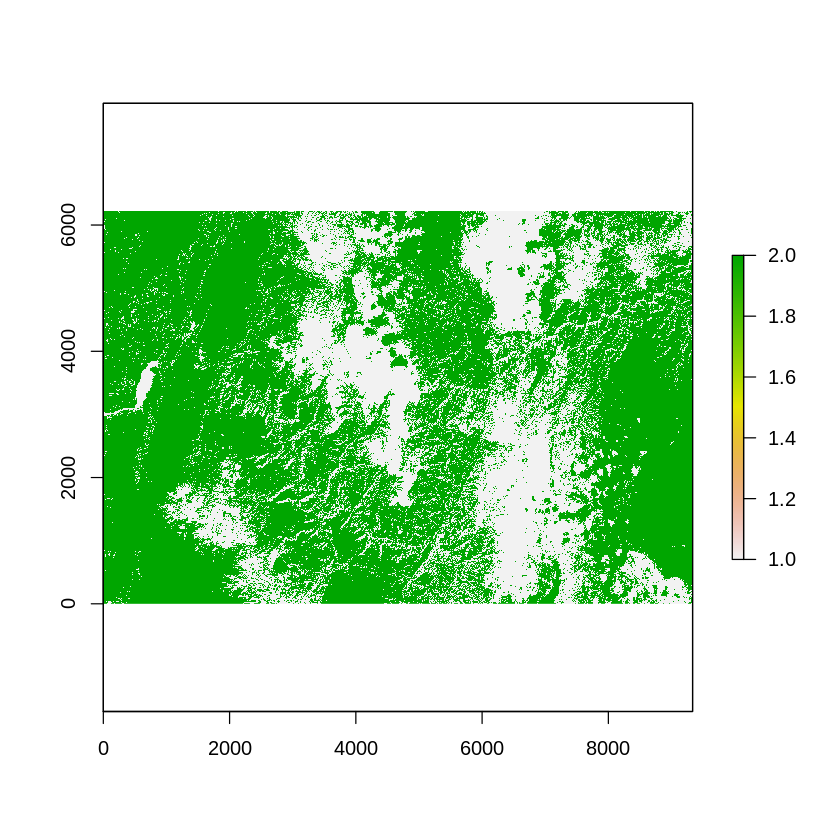

In [ ]:
plot(gcc2$map)

In [ ]:
gcc4 <- unsuperClass(gc, nClasses=4)
plot(gcc4$map)